In [1]:
import pandas as pd

df = pd.read_csv('dataset-am-malaria.csv', sep=";")
cdf = df[['notification.hr', 'notification.month', 'notification.year']].copy()
cdf.rename(columns={'notification.month':'month', 'notification.year':'year'}, inplace=True)
cdf.head()

,notification.hr,month,year
0,MANAUS ENTORNO E ALTO RIO NEGRO,7,2010
1,RIO MADEIRA,1,2011
2,RIO MADEIRA,9,2012
3,RIO MADEIRA,1,2011
4,RIO MADEIRA,3,2017


In [2]:
mask = cdf['year'] >= 2016
cdf = cdf[mask]
cdf

,notification.hr,month,year
4,RIO MADEIRA,3,2017
9,RIO MADEIRA,5,2016
10,RIO MADEIRA,6,2016
14,RIO MADEIRA,7,2018
17,RIO MADEIRA,7,2017
...,...,...,...
394726,MANAUS ENTORNO E ALTO RIO NEGRO,12,2016
394729,MANAUS ENTORNO E ALTO RIO NEGRO,12,2019
394733,MANAUS ENTORNO E ALTO RIO NEGRO,8,2016
394738,MANAUS ENTORNO E ALTO RIO NEGRO,2,2019


In [3]:
cdf['date'] = cdf.month.astype(str) + "/" + cdf.year.astype(str)
cdf.loc[:,'date'] = pd.to_datetime(cdf.loc[:,"date"]).copy()
cdf.set_index('date', inplace=True)
cdf


,notification.hr,month,year
date,,,
2017-03-01,RIO MADEIRA,3,2017
2016-05-01,RIO MADEIRA,5,2016
2016-06-01,RIO MADEIRA,6,2016
2018-07-01,RIO MADEIRA,7,2018
2017-07-01,RIO MADEIRA,7,2017
...,...,...,...
2016-12-01,MANAUS ENTORNO E ALTO RIO NEGRO,12,2016
2019-12-01,MANAUS ENTORNO E ALTO RIO NEGRO,12,2019
2016-08-01,MANAUS ENTORNO E ALTO RIO NEGRO,8,2016


In [4]:
grouped = cdf.groupby('date')

grouped = grouped['notification.hr'].count()

# grouped = grouped['notification.hr'].value_counts()
# Se usar isso, o lugar passa a ser index também


grouped.head()

date
2016-01-01    1881
2016-02-01    1818
2016-03-01    1664
2016-04-01    1660
2016-05-01    1583
Name: notification.hr, dtype: int64

<AxesSubplot:xlabel='date'>

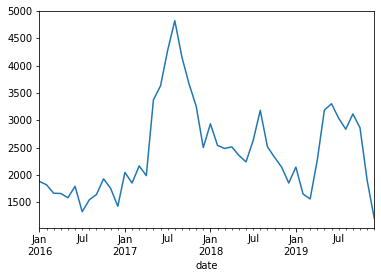

In [5]:
grouped.plot(y=cdf)



In [6]:
manaus = cdf['notification.hr'] == "MANAUS ENTORNO E ALTO RIO NEGRO"
cdf = cdf[manaus]
cdf

,notification.hr,month,year
date,,,
2019-08-01,MANAUS ENTORNO E ALTO RIO NEGRO,8,2019
2017-11-01,MANAUS ENTORNO E ALTO RIO NEGRO,11,2017
2019-04-01,MANAUS ENTORNO E ALTO RIO NEGRO,4,2019
2018-06-01,MANAUS ENTORNO E ALTO RIO NEGRO,6,2018
2017-02-01,MANAUS ENTORNO E ALTO RIO NEGRO,2,2017
...,...,...,...
2016-12-01,MANAUS ENTORNO E ALTO RIO NEGRO,12,2016
2019-12-01,MANAUS ENTORNO E ALTO RIO NEGRO,12,2019
2016-08-01,MANAUS ENTORNO E ALTO RIO NEGRO,8,2016


In [7]:
cdf = cdf.groupby('date')
cdf = cdf['notification.hr'].count()

cdf.to_csv("Manaus-Dados.csv")
cdf

date
2016-01-01     761
2016-02-01     593
2016-03-01     572
2016-04-01     551
2016-05-01     546
2016-06-01     503
2016-07-01     370
2016-08-01     486
2016-09-01     822
2016-10-01     995
2016-11-01     822
2016-12-01     629
2017-01-01    1170
2017-02-01    1059
2017-03-01    1097
2017-04-01     682
2017-05-01    1126
2017-06-01    1168
2017-07-01    1423
2017-08-01    2166
2017-09-01    2208
2017-10-01    1746
2017-11-01    1505
2017-12-01    1154
2018-01-01    1384
2018-02-01    1112
2018-03-01    1046
2018-04-01    1078
2018-05-01     806
2018-06-01     749
2018-07-01     765
2018-08-01    1121
2018-09-01     970
2018-10-01    1129
2018-11-01    1152
2018-12-01     986
2019-01-01    1223
2019-02-01     827
2019-03-01     593
2019-04-01     679
2019-05-01    1135
2019-06-01     955
2019-07-01     915
2019-08-01    1199
2019-09-01    1415
2019-10-01    1582
2019-11-01     888
2019-12-01     465
Name: notification.hr, dtype: int64

<AxesSubplot:xlabel='date'>

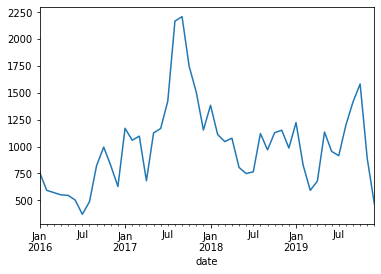

In [8]:
cdf.plot(y=cdf)